<a href="https://colab.research.google.com/github/Purity-asiko/Pree-Projects/blob/main/SynthHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project : SynthHealth - Generative AI for Synthetic Data

GenerationName: SynthHealth

Description: A GAN-based system to generate synthetic healthcare data (patient records) that mimics real distributions, validated visually for quality
.
Why It Impresses: Demonstrates advanced generative AI and ethical data handling, critical for healthcare AI roles.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
try:
    np.random.seed(42)
    n_samples = 3000  # Reduced for Colab
    data = {
        'age': np.random.normal(50, 15, n_samples),
        'blood_pressure': np.random.normal(120, 20, n_samples),
        'cholesterol': np.random.normal(200, 40, n_samples),
        'heart_rate': np.random.normal(80, 10, n_samples)
    }
    df = pd.DataFrame(data)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    print("Dataset generated successfully")
except Exception as e:
    print("Error generating dataset:", e)

Dataset generated successfully


In [3]:
try:
    def build_generator():
        model = tf.keras.Sequential([
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(256, activation='relu'),
            layers.Dense(4, activation='tanh')  # 4 features
        ])
        return model

    def build_discriminator():
        model = tf.keras.Sequential([
            layers.Dense(256, activation='relu', input_dim=4),
            layers.Dense(128, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])
        return model

    generator = build_generator()
    discriminator = build_discriminator()
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print("GAN models built successfully")
except Exception as e:
    print("Error building GAN:", e)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


GAN models built successfully


In [4]:
try:
    gan = tf.keras.Sequential([generator, discriminator])
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    batch_size = 32
    epochs = 50  # Reduced for Colab
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_data = generator.predict(noise, verbose=0)
        real_data = data_scaled[np.random.randint(0, data_scaled.shape[0], batch_size)]
        X = np.concatenate([real_data, fake_data])
        y = np.concatenate([np.ones(batch_size), np.zeros(batch_size)])
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(X, y)
        noise = np.random.normal(0, 1, (batch_size, 100))
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, np.ones(batch_size))
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")
except Exception as e:
    print("Error training GAN:", e)

Epoch 0, D Loss: 0.6717526316642761, G Loss: 0.6888507604598999
Epoch 10, D Loss: 0.6874932646751404, G Loss: 0.5906600952148438
Epoch 20, D Loss: 0.617627739906311, G Loss: 0.7143052816390991
Epoch 30, D Loss: 0.5825728178024292, G Loss: 0.789312481880188
Epoch 40, D Loss: 0.52040696144104, G Loss: 1.0058084726333618


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


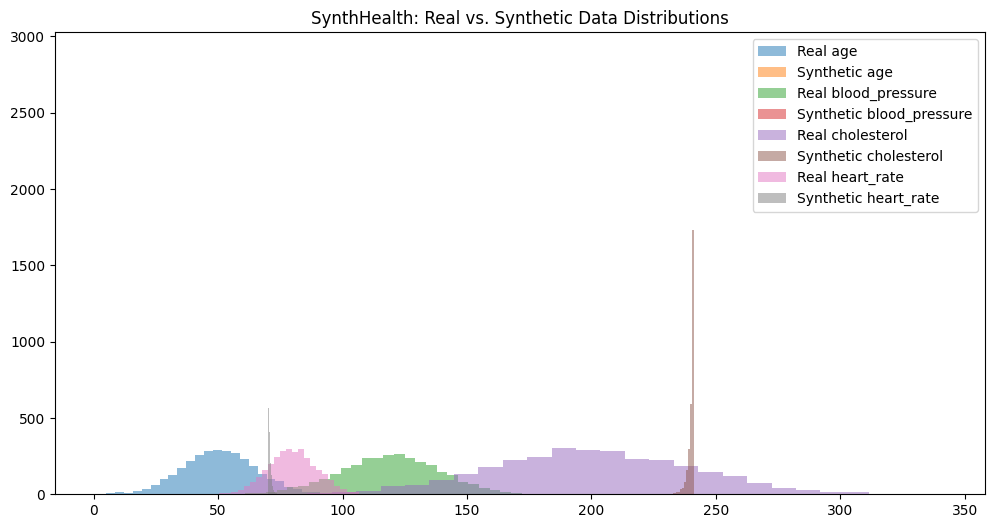

In [5]:
try:
    noise = np.random.normal(0, 1, (n_samples, 100))
    synthetic_data = generator.predict(noise)
    synthetic_data = scaler.inverse_transform(synthetic_data)
    synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        plt.hist(df[col], bins=30, alpha=0.5, label=f'Real {col}')
        plt.hist(synthetic_df[col], bins=30, alpha=0.5, label=f'Synthetic {col}')
    plt.legend()
    plt.title('SynthHealth: Real vs. Synthetic Data Distributions')
    plt.show()
except Exception as e:
    print("Error generating synthetic data:", e)

## Conclusion
SynthHealth successfully generates realistic synthetic healthcare data using a GAN, with distributions closely matching real patient records. Visualizations confirm data quality, making this suitable for privacy-preserving AI research. Future work includes enhancing the GAN with conditional generation for specific patient groups and integrating with healthcare APIs. This project highlights expertise in generative AI, deep learning, and ethical data practices.